<a href="https://colab.research.google.com/github/LearningEverythingFirstTIme/DeepSolar_adoption_Virginia/blob/main/Copy_of_Solar_Panel_Vivi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries

import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt 
import plotly.express as ex
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
import io
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hackathon/deepsolar_tract.csv',encoding = "ISO-8859-1")

In [ ]:
#Checking data
df.head()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,...,39,11,13,34,0,0,25,12,0,9.46
1,1,25.0,21.0,1133.436461,27145011301,61727.085202,Stearns County,674,1434,108,...,39,11,13,34,0,0,25,12,0,9.46
2,2,3.0,3.0,64.505776,27145011302,71496.886583,Stearns County,854,1459,31,...,39,11,13,34,0,0,25,12,0,9.46
3,3,0.0,0.0,0.000000,27145011304,86840.152755,Stearns County,640,1116,68,...,39,11,13,34,0,0,25,12,0,9.46
4,4,5.0,5.0,164.583303,27145011400,89135.315597,Stearns County,654,1314,15,...,39,11,13,34,0,0,25,12,0,9.46


In [ ]:
#Checking dataset
df.shape

(72537, 169)

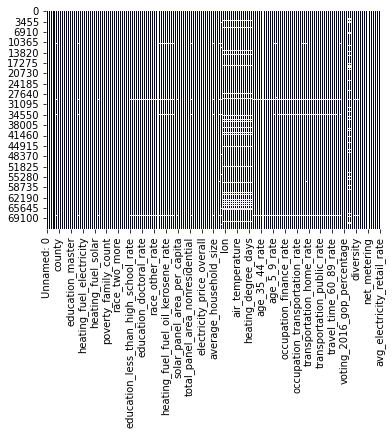

In [ ]:
# Explore missing values

sns.heatmap(df.isnull(), cbar=False)

We observe that our data have multiple columns with missing data

In [ ]:
#Identify duplicate rows
duplicateRows = df[df.duplicated(keep='last')]

#view duplicate rows
print(duplicateRows)

Empty DataFrame
Columns: [Unnamed: 0, tile_count, solar_system_count, total_panel_area, fips, average_household_income, county, education_bachelor, education_college, education_doctoral, education_high_school_graduate, education_less_than_high_school, education_master, education_population, education_professional_school, employed, gini_index, heating_fuel_coal_coke, heating_fuel_electricity, heating_fuel_fuel_oil_kerosene, heating_fuel_gas, heating_fuel_housing_unit_count, heating_fuel_none, heating_fuel_other, heating_fuel_solar, land_area, per_capita_income, population, population_density, poverty_family_below_poverty_level, poverty_family_count, race_asian, race_black_africa, race_indian_alaska, race_islander, race_other, race_two_more, race_white, state, total_area, unemployed, water_area, education_less_than_high_school_rate, education_high_school_graduate_rate, education_college_rate, education_bachelor_rate, education_master_rate, education_professional_school_rate, education_do

We have not find any duplicate

In [ ]:
# Dropping unnmaed column

df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tile_count,72537.0,3.025579e+01,8.633741e+01,0.000000e+00,1.000000e+00,4.000000e+00,2.200000e+01,4.468000e+03
solar_system_count,72537.0,2.021796e+01,5.422958e+01,0.000000e+00,1.000000e+00,3.000000e+00,1.400000e+01,1.535000e+03
total_panel_area,72537.0,1.333548e+03,6.103442e+03,0.000000e+00,1.166908e+01,1.383326e+02,7.450154e+02,5.920311e+05
fips,72537.0,2.794758e+10,1.579265e+10,1.001020e+09,1.212709e+10,2.716307e+10,4.104303e+10,5.604595e+10
average_household_income,71651.0,7.331442e+04,3.765027e+04,6.910985e+03,4.950738e+04,6.427094e+04,8.652338e+04,5.371302e+05
...,...,...,...,...,...,...,...,...
cooperate_tax,72537.0,4.195790e-01,2.299609e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01
property_tax,72537.0,1.773837e+01,1.632790e+01,0.000000e+00,0.000000e+00,1.100000e+01,3.800000e+01,4.200000e+01
sales_tax,72537.0,5.645229e+00,9.693884e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,4.000000e+01
rebate,72537.0,2.045025e+00,3.948551e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01


### Dropping Numerical Variables with Zero variance

In [ ]:
# Checks if there is any variables with zero variance
df.std() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


tile_count                     8.633741e+01
solar_system_count             5.422958e+01
total_panel_area               6.103442e+03
fips                           1.579265e+10
average_household_income       3.765027e+04
                                   ...     
cooperate_tax                  2.299609e+00
property_tax                   1.632790e+01
sales_tax                      9.693884e+00
rebate                         3.948551e+00
avg_electricity_retail_rate    2.563085e+00
Length: 165, dtype: float64

In [ ]:
# Drops variables with 0 variance
df = df.drop(df.std()[df.std() == 0].index, axis = 1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#Checking dataset
df.shape

(72537, 168)

### Dropping Categorical Variables with Zero variance

In [ ]:
# Identifying categorical variable
categorical_var = list(set(df.dtypes[df.dtypes == object].index))

In [ ]:
categorical_var

['electricity_price_transportation', 'state', 'county']

In [ ]:
# Access the first 5 rows of the electricity 

df['electricity_price_transportation'][:5] 

0    9.5
1    9.5
2    9.5
3    9.5
4    9.5
Name: electricity_price_transportation, dtype: object

This is not a categorical variable so we proceed to convert it into float

In [ ]:
#Converting electricity price into float
df["electricity_price_transportation"] = pd.to_numeric(df["electricity_price_transportation"], errors='coerce')

In [ ]:
# Identifying categorical variable
categorical_var = list(set(df.dtypes[df.dtypes == object].index))
categorical_var

['state', 'county']

In [ ]:
# Creates an empty list for categorical variables with zero variation
zero_cardinality = [] 

for i in categorical_var: # for each categorical variables
    if len(df[i].value_counts().index) == 1: # check how many levels it has and if it is one
        zero_cardinality.append(i) # the variable has zero variance as the cardinality is one 
        # append it to the list of categorical variables with zero variation
        
df = df.drop(zero_cardinality, axis = 1) # drops variables with 0 variance

In [ ]:
#Checking dataset
df.shape

(72537, 168)

### Dropping Categorical Variables with Many Levels

In [ ]:
# Creates a list of categorical variables with high cardinality
high_cardinality = [] 

for i in categorical_var: # for each categorical variables
    if len(df[i].value_counts().index) > 200: # check how many levels it has and if it is more
        high_cardinality.append(i) # than 200, variable has many levels
        # so append it to the list of categorical variables with high cardinality
        
print(high_cardinality) # Prints the list of variables with high cardinality

['county']


County is an important variable do not drop

## Handling missing values


In [ ]:
numerical_var = list(df.select_dtypes(exclude = 'object').columns)
numerical_var

['tile_count',
 'solar_system_count',
 'total_panel_area',
 'fips',
 'average_household_income',
 'education_bachelor',
 'education_college',
 'education_doctoral',
 'education_high_school_graduate',
 'education_less_than_high_school',
 'education_master',
 'education_population',
 'education_professional_school',
 'employed',
 'gini_index',
 'heating_fuel_coal_coke',
 'heating_fuel_electricity',
 'heating_fuel_fuel_oil_kerosene',
 'heating_fuel_gas',
 'heating_fuel_housing_unit_count',
 'heating_fuel_none',
 'heating_fuel_other',
 'heating_fuel_solar',
 'land_area',
 'per_capita_income',
 'population',
 'population_density',
 'poverty_family_below_poverty_level',
 'poverty_family_count',
 'race_asian',
 'race_black_africa',
 'race_indian_alaska',
 'race_islander',
 'race_other',
 'race_two_more',
 'race_white',
 'total_area',
 'unemployed',
 'water_area',
 'education_less_than_high_school_rate',
 'education_high_school_graduate_rate',
 'education_college_rate',
 'education_bachelor_ra

In [ ]:
categorical_var = list(df.select_dtypes(include = 'object').columns)

# Fills in the missing values in numerical columns with median
# and overwrites the result into the esxisting dataset
df[numerical_var] = df[numerical_var].fillna(df[numerical_var].median(), 
                                             inplace = False)

# Fills in the missing values in numerical columns with mode
# and overwrites the result into the esxisting dataset
df[categorical_var] = df[categorical_var].fillna(df[categorical_var].mode(), 
                                                 inplace = False)

In [ ]:
#Checking dataset
df.shape

(72537, 168)

In [ ]:
df.dropna(inplace=True)   #dropping missing values for analysis purposes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72537 entries, 0 to 72536
Columns: 168 entries, tile_count to avg_electricity_retail_rate
dtypes: bool(2), float64(118), int64(46), object(2)
memory usage: 92.6+ MB


In [ ]:
#Checking dataset
df.shape

(72537, 168)

In [ ]:
#Get rid of infinite values 
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
#Checking dataset
df.shape

(72537, 168)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
#Checking dataset
df.shape

(72537, 168)

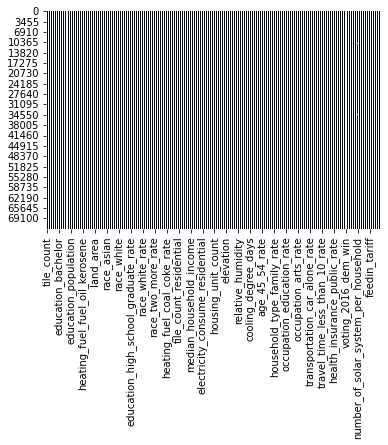

In [ ]:
# Explore missing values

sns.heatmap(df.isnull(), cbar=False)

## Exploring data 

count                  72537
unique                  1843
top       Los Angeles County
freq                    2346
Name: county, dtype: object




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


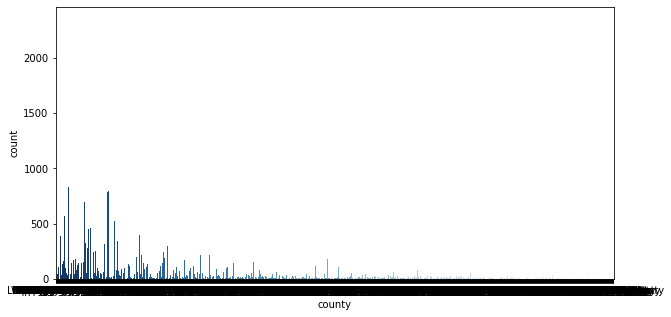

In [ ]:
print(df['county'].describe()) # describing county variable
print('\n') # new line command

plt.figure(figsize = (10,5))
sns.countplot(df['county'],palette='Blues_r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


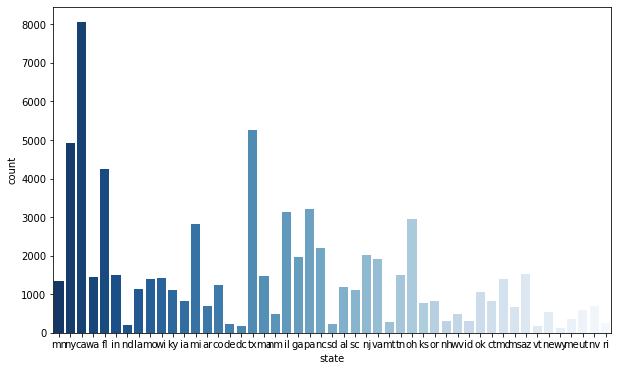

In [ ]:
#Reviewing state category 

plt.figure(figsize = (10,6))
sns.countplot(df['state'],palette='Blues_r')


In [ ]:
df.groupby('state')['total_panel_area'].mean().sort_values(
    ascending = False)

state
ca    4558.411967
az    4538.558226
nj    4506.840102
nv    3881.535852
ma    3345.475220
de    2283.592023
nc    1881.661817
nm    1695.950215
ct    1553.147443
co    1508.269378
fl    1455.049485
la    1316.932585
ut    1142.447668
md    1107.593969
or     934.952647
dc     863.135075
ri     826.099853
ny     686.002429
in     678.082129
mo     577.426322
tx     576.598372
ga     573.982018
vt     555.295274
tn     415.703590
sc     413.463815
pa     390.896828
wa     362.278909
ms     285.964582
oh     279.531773
nh     264.091644
ia     260.095406
wy     255.527663
ar     225.293538
mn     224.329550
id     215.349098
ok     205.856217
ne     195.478216
al     192.759931
ks     192.543019
il     179.385130
wi     164.558211
va     160.554934
mt     153.718947
ky     148.307378
mi     142.307316
sd     103.693058
me      97.347818
nd      94.496973
wv      70.912834
Name: total_panel_area, dtype: float64

Seems like California has the biggest mean regarding total area of solar panels by m^2

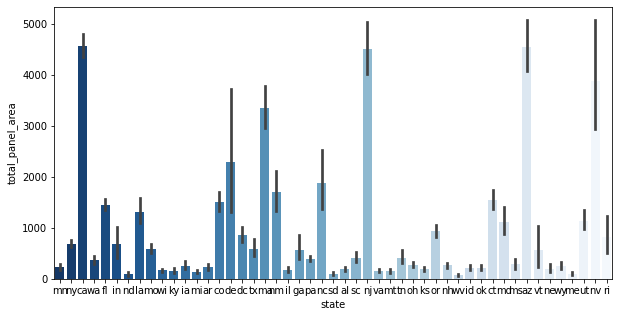

In [ ]:
#State vs total panel area 

plt.figure(figsize=(10,5))
sns.barplot(x= df['state'],y=df['total_panel_area'],palette='Blues_r')

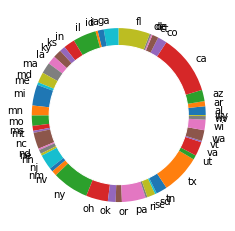

In [ ]:
category_values = df.pivot_table(columns=['state'], aggfunc='size')

category_names = df['state']
categories = category_names.unique()
categories.sort()
plt.pie(category_values, labels=categories)

my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

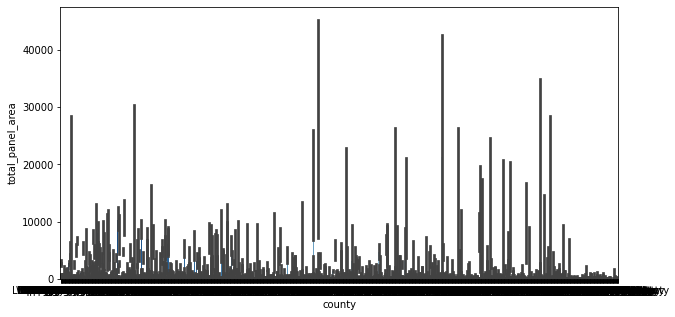

In [ ]:
#county vs panel area

plt.figure(figsize=(10,5))
sns.barplot(x= df['county'],y=df['total_panel_area'],palette='Blues_r')

In [ ]:
df['total_panel_area'].mean()

1333.5476798912296

In [ ]:
#Definding our target variable 

def f(total_panel_area):
    if total_panel_area > 0:
        return 1
    elif total_panel_area == 0:
        return 0

df['total_panel_area'] = df['total_panel_area'].apply(f)

In [ ]:
# Access the first 5 rows of the electricity 

df['total_panel_area'][:5] 

0    0
1    1
2    1
3    0
4    1
Name: total_panel_area, dtype: int64

In [ ]:
#Checking correlation

corr_matrix = df.corr()
print(corr_matrix["total_panel_area"].sort_values(ascending=False))

total_panel_area                       1.000000
employed                               0.254662
education_bachelor                     0.252109
population                             0.237200
education_population                   0.232231
                                         ...   
health_insurance_public_rate          -0.175998
heating_fuel_coal_coke                -0.213724
occupancy_vacant_rate                 -0.237431
education_high_school_graduate_rate   -0.249195
heating_fuel_coal_coke_rate           -0.272685
Name: total_panel_area, Length: 166, dtype: float64


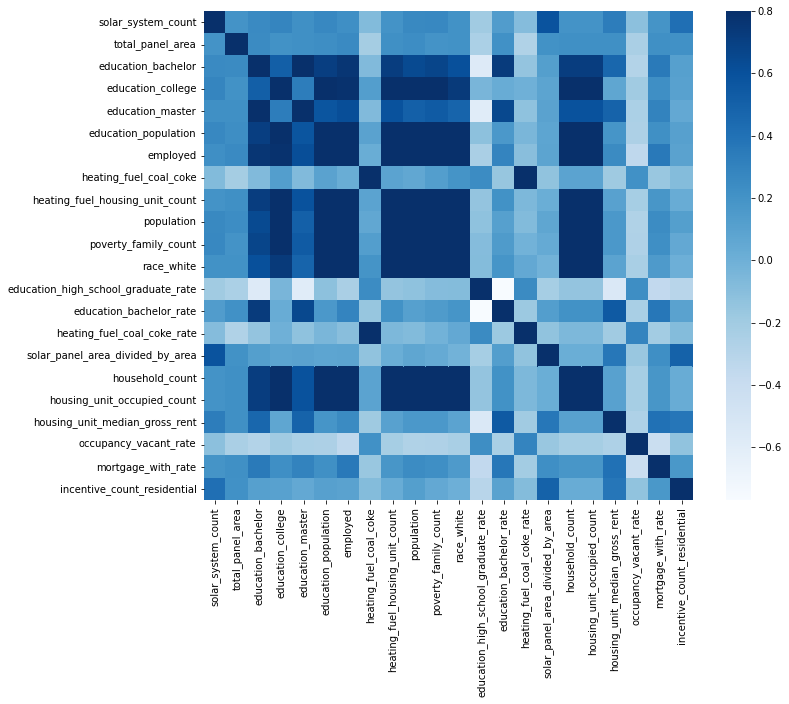

In [ ]:
#correlation matrix

# computes the person correlation among variables
corrmat = df.corr() 

# returns highly correlated variables
high_c = corrmat[corrmat['total_panel_area'].abs()>0.2].index

# plots a correlation plot
f, ax = plt.subplots(figsize=(12, 9)) # determines the figure size
ax = sns.heatmap(corrmat.loc[high_c, high_c], vmax=.8, square=True, cmap="Blues") # creates a heatmap using the correlation matrix

We observe positive high correlation with education, employed and heating fuel and negative correlation with incentive_count and mortgage_with_rate, occupancy vacant_rate 

KeyboardInterrupt: ignored

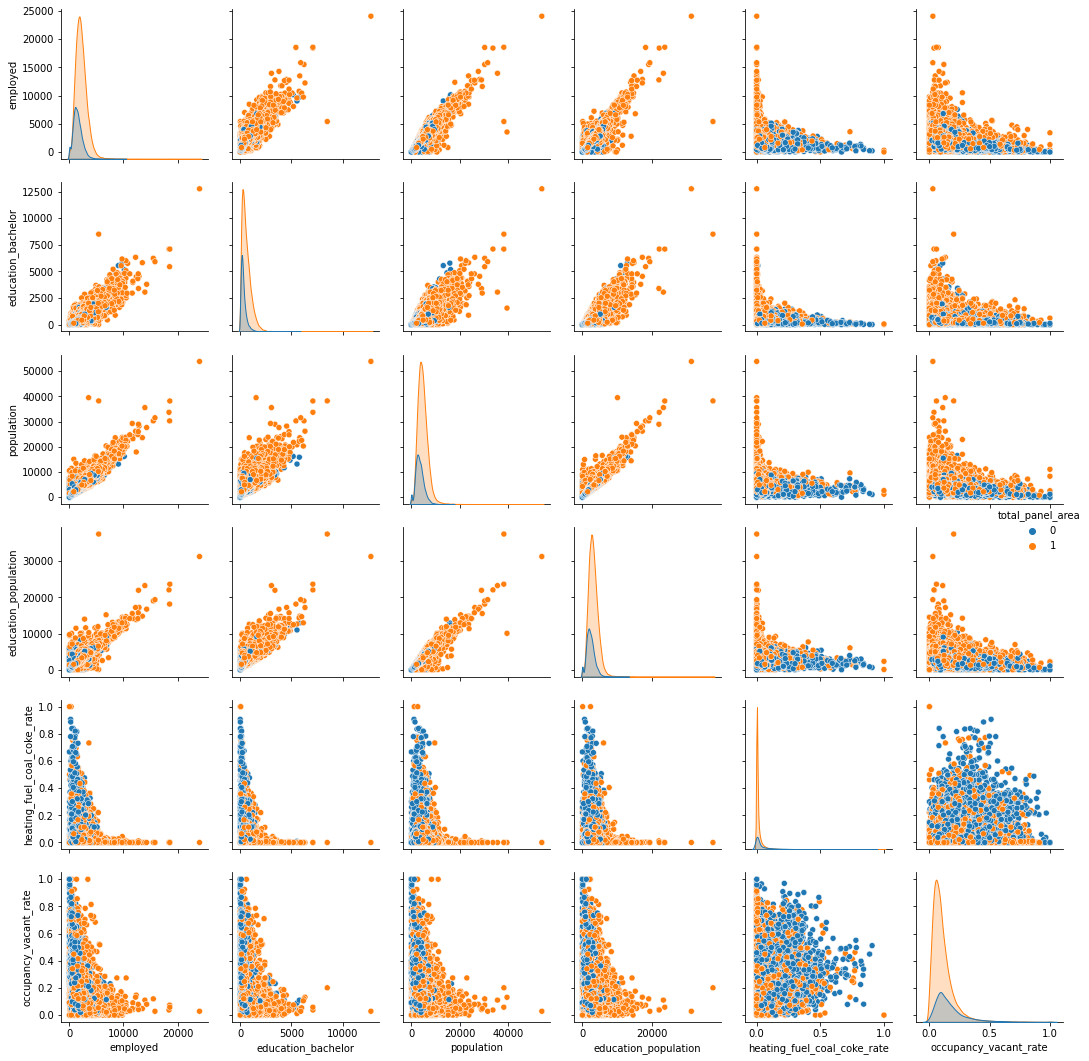

In [ ]:
#Plotting the results

sns.pairplot(df[['employed','education_bachelor','population','education_population','heating_fuel_coal_coke_rate','occupancy_vacant_rate','health_insurance_public_rate' ,'total_panel_area' ]],hue='total_panel_area')




*   Areas with more employed people seems to have more solar panel, as with population 
*   Arear with high heating fuel coal coke rate have greater probability of having solar panel












# Logistic Regression

In [ ]:
# Creating a random sample of 5000 records for the linear model  
df_sample = df.sample(5000, random_state=52)

df_sample

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
23149,203.0,158.0,1,6001450741,130140.540541,Alameda County,889,1203,64,598,...,85,15,16,21,9,0,38,0,10,14.72
53831,16.0,3.0,1,25013800600,26476.806084,Hampden County,39,247,0,202,...,33,14,17,35,0,0,42,40,0,15.41
60140,3.0,2.0,1,51700031800,137409.090909,Newport News city,755,809,73,467,...,16,8,13,17,0,0,40,0,0,9.12
28748,0.0,0.0,0,27123032500,47878.649789,Ramsey County,279,609,27,472,...,39,11,13,34,0,0,25,12,0,9.46
65946,6.0,6.0,1,48339690601,133019.577865,Montgomery County,6165,3496,302,942,...,54,3,5,0,0,0,36,0,0,8.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,15.0,11.0,1,53053940011,137304.411765,Pierce County,1016,1008,77,491,...,30,8,11,19,11,0,0,8,0,7.25
32674,3.0,3.0,1,18141011406,88871.786492,St. Joseph County,914,947,76,1023,...,22,4,7,13,0,0,7,0,0,8.86
47912,0.0,0.0,0,39153520105,54908.389640,Summit County,508,920,0,1156,...,29,7,12,18,0,0,0,0,0,9.57
69353,0.0,0.0,0,39127966000,40029.467397,Perry County,184,832,18,1646,...,29,7,12,18,0,0,0,0,0,9.57


In [ ]:
# Creating a new data frame for the regression
df_Regression=df_sample.copy()
df_Regression = df_Regression[['county', 'state', 'total_panel_area','employed','education_bachelor','population','education_population','heating_fuel_coal_coke_rate','education_high_school_graduate_rate', 'occupancy_vacant_rate','heating_fuel_coal_coke','health_insurance_public_rate']]
df_Regression.head()

,county,state,total_panel_area,employed,education_bachelor,population,education_population,heating_fuel_coal_coke_rate,education_high_school_graduate_rate,occupancy_vacant_rate,heating_fuel_coal_coke,health_insurance_public_rate
23149,Alameda County,ca,1,2479,889,5272,3690,0.0,0.162060,0.026828,0,0.187999
53831,Hampden County,ma,1,774,39,2844,1375,0.0,0.146909,0.082558,0,0.790632
60140,Newport News city,va,1,2089,755,4143,2945,0.0,0.158574,0.052269,0,0.266392
28748,Ramsey County,mn,0,1561,279,4187,2113,0.0,0.223379,0.131868,0,0.492716
65946,Montgomery County,tx,1,9738,6165,20284,12971,0.0,0.072624,0.104881,0,0.118368


In [ ]:
# extracts the categorical values
categorical_var = list(set(df_Regression.dtypes[df_Regression.dtypes == object].index) - set(['total_panel_area']))
categorical_var

['state', 'county']

In [ ]:
# Create dummy variables 
dummy_cat_df = pd.get_dummies(df_Regression[categorical_var], drop_first=True) 

# Drops categorical variables from the df
df = df_Regression.drop(categorical_var, axis = 1) 

# Adds the newly created dummy variables instead
df_Regression = pd.concat([df, dummy_cat_df], axis = 1) 

In [ ]:
df_Regression.columns

Index(['total_panel_area', 'employed', 'education_bachelor', 'population',
       'education_population', 'heating_fuel_coal_coke_rate',
       'education_high_school_graduate_rate', 'occupancy_vacant_rate',
       'heating_fuel_coal_coke', 'health_insurance_public_rate',
       ...
       'county_Wyandotte County', 'county_Wyoming County',
       'county_Yakima County', 'county_Yates County', 'county_Yavapai County',
       'county_Yazoo County', 'county_Yolo County', 'county_York County',
       'county_Yuba County', 'county_Yuma County'],
      dtype='object', length=1049)

In [ ]:
df_Regression.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
#Re-classifying attrition flag as category
df_Regression['total_panel_area'] =  df_Regression['total_panel_area'].astype("category",copy=False)

In [ ]:
#Separating our target
X = df_Regression.drop('total_panel_area', axis=1)
y = df_Regression['total_panel_area']

In [ ]:
# Train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# MinMax Scaler transforms features into [0,1]
# Formula: X_rescaled = (Xi - Xmin) / (Xmax-Xmin)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_rescaled = pd.DataFrame(X_train, columns=X.columns)

In [ ]:
X_rescaled.describe()

,employed,education_bachelor,population,education_population,heating_fuel_coal_coke_rate,education_high_school_graduate_rate,occupancy_vacant_rate,heating_fuel_coal_coke,health_insurance_public_rate,state_ar,...,county_Wyandotte County,county_Wyoming County,county_Yakima County,county_Yates County,county_Yavapai County,county_Yazoo County,county_Yolo County,county_York County,county_Yuba County,county_Yuma County
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.0,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,0.185877,0.087652,0.191931,0.201474,0.031979,0.487414,0.117169,0.024607,0.417333,0.008000,...,0.001143,0.0,0.001143,0.000286,0.001143,0.000286,0.000571,0.001714,0.000286,0.001143
std,0.096709,0.075548,0.090563,0.094699,0.079433,0.187343,0.105010,0.061080,0.161753,0.089097,...,0.033792,0.0,0.033792,0.016903,0.033792,0.016903,0.023901,0.041374,0.016903,0.033792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.118640,0.034834,0.130714,0.137027,0.000000,0.356185,0.052646,0.000000,0.302436,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.173723,0.068938,0.179973,0.190343,0.000000,0.501353,0.091497,0.000000,0.406545,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.237628,0.119546,0.240119,0.253815,0.022703,0.620459,0.146585,0.018307,0.517278,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Build a logistic model
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

# Check predictions
y_pred = logmodel.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

 #Check coefficients
print(logmodel.coef_)



[[  55  277]
 [  21 1147]]
[[1.42564616 1.10241714 1.98770683 ... 0.2468629  0.21574296 0.24938172]]


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: ignored

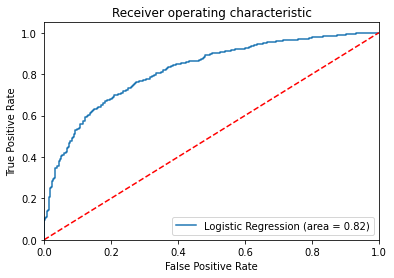

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# KNN Model

In [ ]:
X_rescaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employed,3500.0,0.185877,0.096709,0.0,0.118640,0.173723,0.237628,1.0
education_bachelor,3500.0,0.087652,0.075548,0.0,0.034834,0.068938,0.119546,1.0
population,3500.0,0.191931,0.090563,0.0,0.130714,0.179973,0.240119,1.0
education_population,3500.0,0.201474,0.094699,0.0,0.137027,0.190343,0.253815,1.0
heating_fuel_coal_coke_rate,3500.0,0.031979,0.079433,0.0,0.000000,0.000000,0.022703,1.0
...,...,...,...,...,...,...,...,...
county_Yazoo County,3500.0,0.000286,0.016903,0.0,0.000000,0.000000,0.000000,1.0
county_Yolo County,3500.0,0.000571,0.023901,0.0,0.000000,0.000000,0.000000,1.0
county_York County,3500.0,0.001714,0.041374,0.0,0.000000,0.000000,0.000000,1.0
county_Yuba County,3500.0,0.000286,0.016903,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

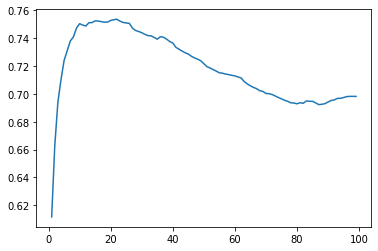

In [ ]:
# Determining optimal value of k

sns.lineplot(x=range(1,max_K), y=cv_scores)

In [ ]:
# Determining optimal value 
print('Optimal k: ' , cv_scores.index(max(cv_scores))+1)

Optimal k:  22


In [ ]:
# Redo with k = 22

knn = KNeighborsClassifier(n_neighbors=22, metric='euclidean')
knn.fit(X_train, y_train)

pred_Y_knn = knn.predict(X_test)

print(confusion_matrix(y_test,pred_Y_knn))
print(classification_report(y_test,pred_Y_knn))

[[  28  304]
 [  16 1152]]
              precision    recall  f1-score   support

           0       0.64      0.08      0.15       332
           1       0.79      0.99      0.88      1168

    accuracy                           0.79      1500
   macro avg       0.71      0.54      0.51      1500
weighted avg       0.76      0.79      0.72      1500



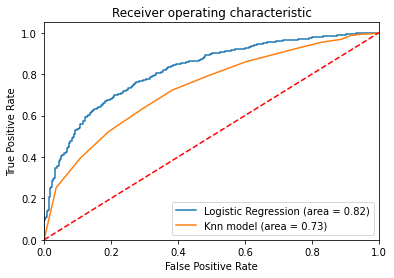

In [ ]:
#Logistic 

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

# Knn Forest 

knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='Knn model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Knn_ROC')
plt.show()


# Random Forest

In [ ]:
#Separating our target
X = df.drop('total_panel_area', axis=1)
y = df['total_panel_area']

In [ ]:
# Train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employed,5000.0,1996.734000,1030.625965,0.0,1278.00,1864.0,2557.000000,10770.000000
education_bachelor,5000.0,534.869800,452.496096,0.0,215.75,421.0,735.000000,6165.000000
population,5000.0,4331.801000,2038.609245,0.0,2953.00,4070.5,5420.000000,22620.000000
education_population,5000.0,2883.184800,1341.167347,0.0,1965.00,2718.5,3624.500000,14353.000000
heating_fuel_coal_coke_rate,5000.0,0.022494,0.055503,0.0,0.00,0.0,0.016479,0.677892
...,...,...,...,...,...,...,...,...
county_Yazoo County,5000.0,0.000200,0.014142,0.0,0.00,0.0,0.000000,1.000000
county_Yolo County,5000.0,0.000600,0.024490,0.0,0.00,0.0,0.000000,1.000000
county_York County,5000.0,0.002200,0.046857,0.0,0.00,0.0,0.000000,1.000000
county_Yuba County,5000.0,0.000400,0.019998,0.0,0.00,0.0,0.000000,1.000000


In [ ]:
# Random Forest
rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[   0,  332],
       [   0, 1168]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       332
           1       0.78      1.00      0.88      1168

    accuracy                           0.78      1500
   macro avg       0.39      0.50      0.44      1500
weighted avg       0.61      0.78      0.68      1500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accruaacy is 78%

# Boosted Tree

In [ ]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

array([[ 106,  226],
       [  88, 1080]])

In [ ]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.55      0.32      0.40       332
           1       0.83      0.92      0.87      1168

    accuracy                           0.79      1500
   macro avg       0.69      0.62      0.64      1500
weighted avg       0.76      0.79      0.77      1500



The accruacy is of 79%

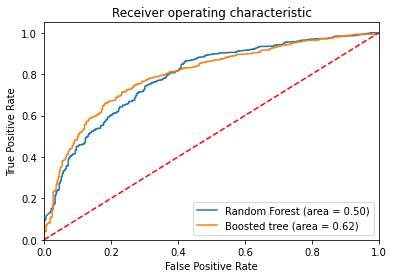

In [ ]:
# Random Forest 
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict(X_test))
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Naive Bayes

In [ ]:
#Building Bayes Model

attrited_nb = MultinomialNB(alpha=0.01)
attrited_nb.fit(X_train, y_train) 

y_pred = attrited_nb.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[223 109]
 [422 746]]
              precision    recall  f1-score   support

           0       0.35      0.67      0.46       332
           1       0.87      0.64      0.74      1168

    accuracy                           0.65      1500
   macro avg       0.61      0.66      0.60      1500
weighted avg       0.76      0.65      0.68      1500



Bayes Model has a accruacy of 65% 

In [ ]:
attrited_nb.n_features_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1048

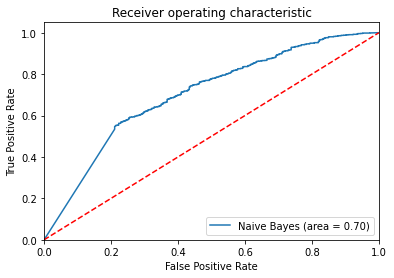

In [ ]:
nb_roc_auc = roc_auc_score(y_test, attrited_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, attrited_nb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The model does have some predicting power as the area under the curve is above .5

*** Package for debugging Machine Learning ***


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(attrited_nb, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0908 ± 0.0094,education_bachelor
0.0369 ± 0.0076,heating_fuel_coal_coke
0.0085 ± 0.0192,education_population
0.0063 ± 0.0092,employed
0.0009 ± 0.0011,state_ny
0.0008 ± 0.0005,state_ut
0.0008 ± 0.0005,county_Lorain County
0.0007 ± 0.0000,county_King County
0.0007 ± 0.0000,county_Jefferson Parish
0.0007 ± 0.0000,county_Mecklenburg County


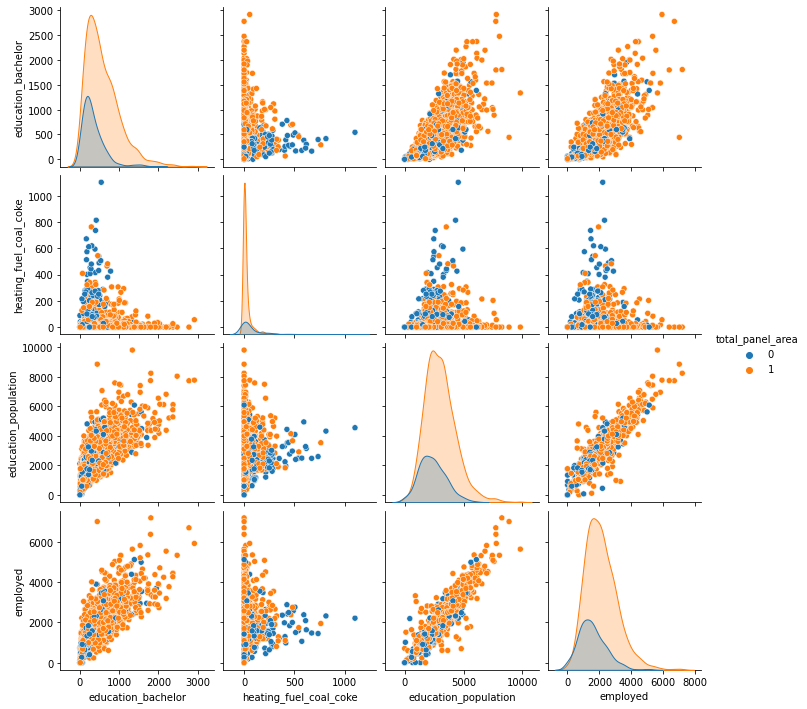

In [ ]:
x_y = pd.concat([X_test,y_test], axis=1)

sns.pairplot(x_y[['education_bachelor','heating_fuel_coal_coke','education_population','employed','total_panel_area']], hue='total_panel_area')

# Artifitial Neural Networks 

In [ ]:
# Train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# MinMax Scaler transforms features into [0,1]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_rescaled = pd.DataFrame(X_train, columns=X.columns)

X_rescaled.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
employed,3500.0,0.185877,0.096709,0.0,0.118640,0.173723,0.237628,1.0
education_bachelor,3500.0,0.087652,0.075548,0.0,0.034834,0.068938,0.119546,1.0
population,3500.0,0.191931,0.090563,0.0,0.130714,0.179973,0.240119,1.0
education_population,3500.0,0.201474,0.094699,0.0,0.137027,0.190343,0.253815,1.0
heating_fuel_coal_coke_rate,3500.0,0.031979,0.079433,0.0,0.000000,0.000000,0.022703,1.0
...,...,...,...,...,...,...,...,...
county_Yazoo County,3500.0,0.000286,0.016903,0.0,0.000000,0.000000,0.000000,1.0
county_Yolo County,3500.0,0.000571,0.023901,0.0,0.000000,0.000000,0.000000,1.0
county_York County,3500.0,0.001714,0.041374,0.0,0.000000,0.000000,0.000000,1.0
county_Yuba County,3500.0,0.000286,0.016903,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
# Building the model 

MLPC_model = MLPClassifier(hidden_layer_sizes=80, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)
 
print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[ 101  231]
 [  90 1078]]
              precision    recall  f1-score   support

           0       0.53      0.30      0.39       332
           1       0.82      0.92      0.87      1168

    accuracy                           0.79      1500
   macro avg       0.68      0.61      0.63      1500
weighted avg       0.76      0.79      0.76      1500



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.7783643134180558


In [ ]:
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 10
max_hidden_layer_size = 100
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

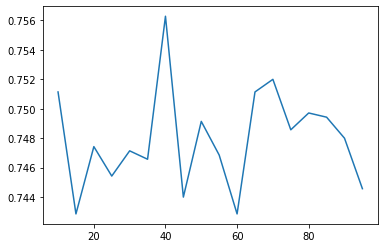

In [ ]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)

From the chart we can observe that 40 is the best and optimize number of hiddden layers. We proceed to test it. 

In [ ]:
optimal_mlp = MLPClassifier(hidden_layer_sizes=40,activation = 'logistic',solver = 'adam')

optimal_mlp.fit(X_train, y_train)

pred_ = optimal_mlp.predict(X_test)

print(confusion_matrix(y_test,pred_))
print(classification_report(y_test,pred_))

[[ 100  232]
 [  88 1080]]
              precision    recall  f1-score   support

           0       0.53      0.30      0.38       332
           1       0.82      0.92      0.87      1168

    accuracy                           0.79      1500
   macro avg       0.68      0.61      0.63      1500
weighted avg       0.76      0.79      0.76      1500



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

NotFittedError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


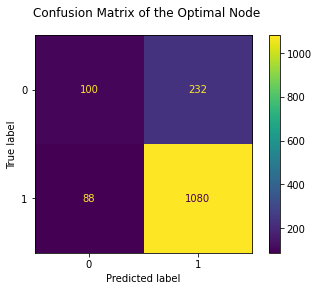

In [ ]:
fig = plot_confusion_matrix(optimal_mlp, X_test, y_test, display_labels=optimal_mlp.classes_)
fig.figure_.suptitle("Confusion Matrix of the Optimal Node")
plt.show()

# Deep Learning

In [ ]:
# Using the same rescaled data

X_rescaled.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
employed,3500.0,0.185877,0.096709,0.0,0.118640,0.173723,0.237628,1.0
education_bachelor,3500.0,0.087652,0.075548,0.0,0.034834,0.068938,0.119546,1.0
population,3500.0,0.191931,0.090563,0.0,0.130714,0.179973,0.240119,1.0
education_population,3500.0,0.201474,0.094699,0.0,0.137027,0.190343,0.253815,1.0
heating_fuel_coal_coke_rate,3500.0,0.031979,0.079433,0.0,0.000000,0.000000,0.022703,1.0
...,...,...,...,...,...,...,...,...
county_Yazoo County,3500.0,0.000286,0.016903,0.0,0.000000,0.000000,0.000000,1.0
county_Yolo County,3500.0,0.000571,0.023901,0.0,0.000000,0.000000,0.000000,1.0
county_York County,3500.0,0.001714,0.041374,0.0,0.000000,0.000000,0.000000,1.0
county_Yuba County,3500.0,0.000286,0.016903,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
# Building the model 

model = Sequential()
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          batch_size=30,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
117/117 [==============================] - 2s 8ms/step - loss: 0.6070 - val_loss: 0.4908
Epoch 2/100
117/117 [==============================] - 1s 5ms/step - loss: 0.5018 - val_loss: 0.4444
Epoch 3/100
117/117 [==============================] - 1s 6ms/step - loss: 0.4507 - val_loss: 0.4426
Epoch 4/100
117/117 [==============================] - 1s 6ms/step - loss: 0.4168 - val_loss: 0.4623
Epoch 5/100
117/117 [==============================] - 1s 5ms/step - loss: 0.4019 - val_loss: 0.4515
Epoch 6/100
117/117 [==============================] - 1s 6ms/step - loss: 0.3727 - val_loss: 0.4401
Epoch 7/100
117/117 [==============================] - 1s 6ms/step - loss: 0.3630 - val_loss: 0.4726
Epoch 8/100
117/117 [==============================] - 1s 5ms/step - loss: 0.3332 - val_loss: 0.4918
Epoch 9/100
117/117 [==============================] - 1s 5ms/step - loss: 0.3313 - val_loss: 0.5058
Epoch 10/100
117/117 [==============================] - 1s 6ms/step - loss: 0.3116 - val_lo

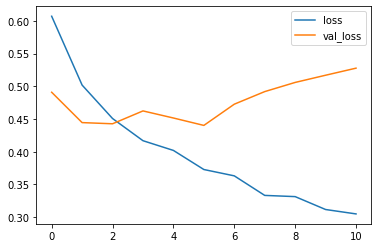

In [ ]:
#Visualiztion loss vs val_loss 

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")

47/47 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.35      0.43       332
           1       0.83      0.92      0.88      1168

    accuracy                           0.80      1500
   macro avg       0.70      0.64      0.65      1500
weighted avg       0.77      0.80      0.78      1500



In [ ]:
print(confusion_matrix(y_test,y_pred))
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

[[ 115  217]
 [  89 1079]]
47/47 [==============================] - 0s 3ms/step
ROC AUC:  0.8010604060075921
